# Projeto

## Classification

## Decision Trees Approach

In [ ]:
import dslabs_functions as dslabs
import numpy as np
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from matplotlib.pyplot import figure, savefig, show
import dslabs_functions as dslabs

file_tag = "Credit_Score"
## Train - resultado do balancing escolhido (over no nosso caso)
train_filename = "data_preparation_final_results_1/data_preparation_csvs/balancing_csvs/data_balancing_alt2_over.csv"
## ficheiro Teste ao qual nao fazemos balancing
test_filename = "data_preparation_final_results_1/data_preparation_csvs/feat_eng_csvs/test_data_feat_select_alt3_RFE.csv"
target = "Credit_Score"
# default
eval_metric = "accuracy"

trnX, tstX, trnY, tstY, labels, vars = dslabs.read_train_test_from_files(
    train_filename, test_filename, target
)
print(f"Train#={len(trnX)} Test#={len(tstX)}")
print(f"Labels={labels}")

### Parameters Study

In [ ]:
trnX, tstX, trnY, tstY, labels, vars = dslabs.read_train_test_from_files(train_filename, test_filename, target)
print(f'Train#={len(trnX)} Test#={len(tstX)}')
print(f'Labels={labels}')

figure()
best_model, params = dslabs.trees_study(trnX, trnY, tstX, tstY, d_max=100, metric=eval_metric)
savefig(f'classification_images/decision_tree/{file_tag}_dt_{eval_metric}_study.png')
show()

### Best Model Performance

In [ ]:
prd_trn: np.array = best_model.predict(trnX)
prd_tst: np.array = best_model.predict(tstX)
figure()
dslabs.plot_evaluation_results(params, trnY, prd_trn, tstY, prd_tst, labels)
savefig(f'classification_images/decision_tree/{file_tag}_dt_{params["name"]}_best_{params["metric"]}_eval.png')
show()

### Variables Importance

Current Directory: /home/ruben/ist/cd/CD_IST/dataset_services
Files in Directory: ['data_enconding.ipynb', 'decision_tree.ipynb', 'data_preparation_csvs', 'francisco.ipynb', 'data_scaling.ipynb', '__pycache__', 'naive_bayes.ipynb', 'dslabs.mplstyle', 'data_mv_imputation.ipynb', 'data_preparation_images', 'config.py', 'rubene', '__MACOSX', 'dslabs_functions.py', 'data_preparation_final_results_1', 'data_outliers_treatment.ipynb', 'class_credit_score.csv', 'data_balancing.ipynb', 'classification_images', 'images', 'ruben.ipynb', 'knn.ipynb']
Command: ['dot', '-Tpng', 'classification_images/decision_tree/Credit_Score_dt_accuracy_best_tree.dot', '-o', 'classification_images/decision_tree/Credit_Score_dt_accuracy_best_tree.png', '-Gdpi=600']


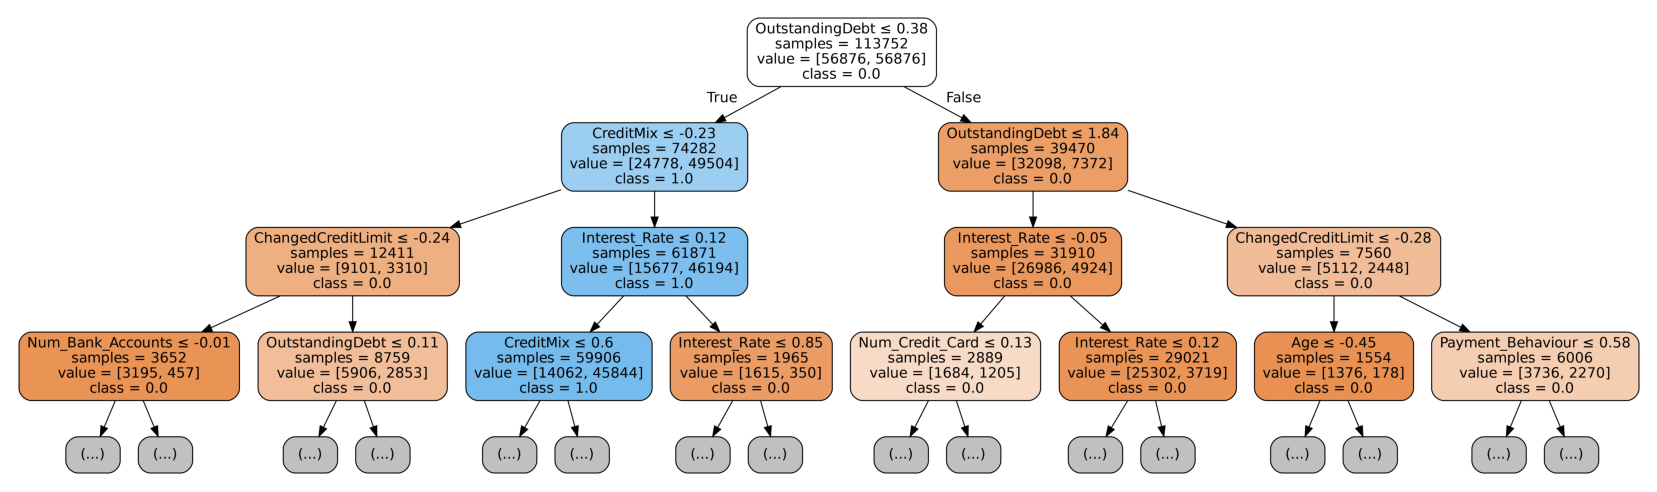

In [8]:
import os
from sklearn.tree import export_graphviz
from matplotlib.pyplot import imread, imshow, axis
from subprocess import call

tree_filename: str = f"classification_images/decision_tree/{file_tag}_dt_{eval_metric}_best_tree"

max_depth2show = 3
st_labels: list[str] = [str(value) for value in labels]

dot_data: str = export_graphviz(
    best_model,
    out_file=tree_filename + ".dot",
    max_depth=max_depth2show,
    feature_names=vars,
    class_names=st_labels,
    filled=True,
    rounded=True,
    impurity=False,
    special_characters=True,
    precision=2,
)

print("Current Directory:", os.getcwd())
print("Files in Directory:", os.listdir())
print("Command:", ["dot", "-Tpng", tree_filename + ".dot", "-o", tree_filename + ".png", "-Gdpi=600"])

# Convert to png
call(
    ["dot", "-Tpng", tree_filename + ".dot", "-o", tree_filename + ".png", "-Gdpi=600"]
)

figure(figsize=(14, 6))
imshow(imread(tree_filename + ".png"))
axis("off")
show()

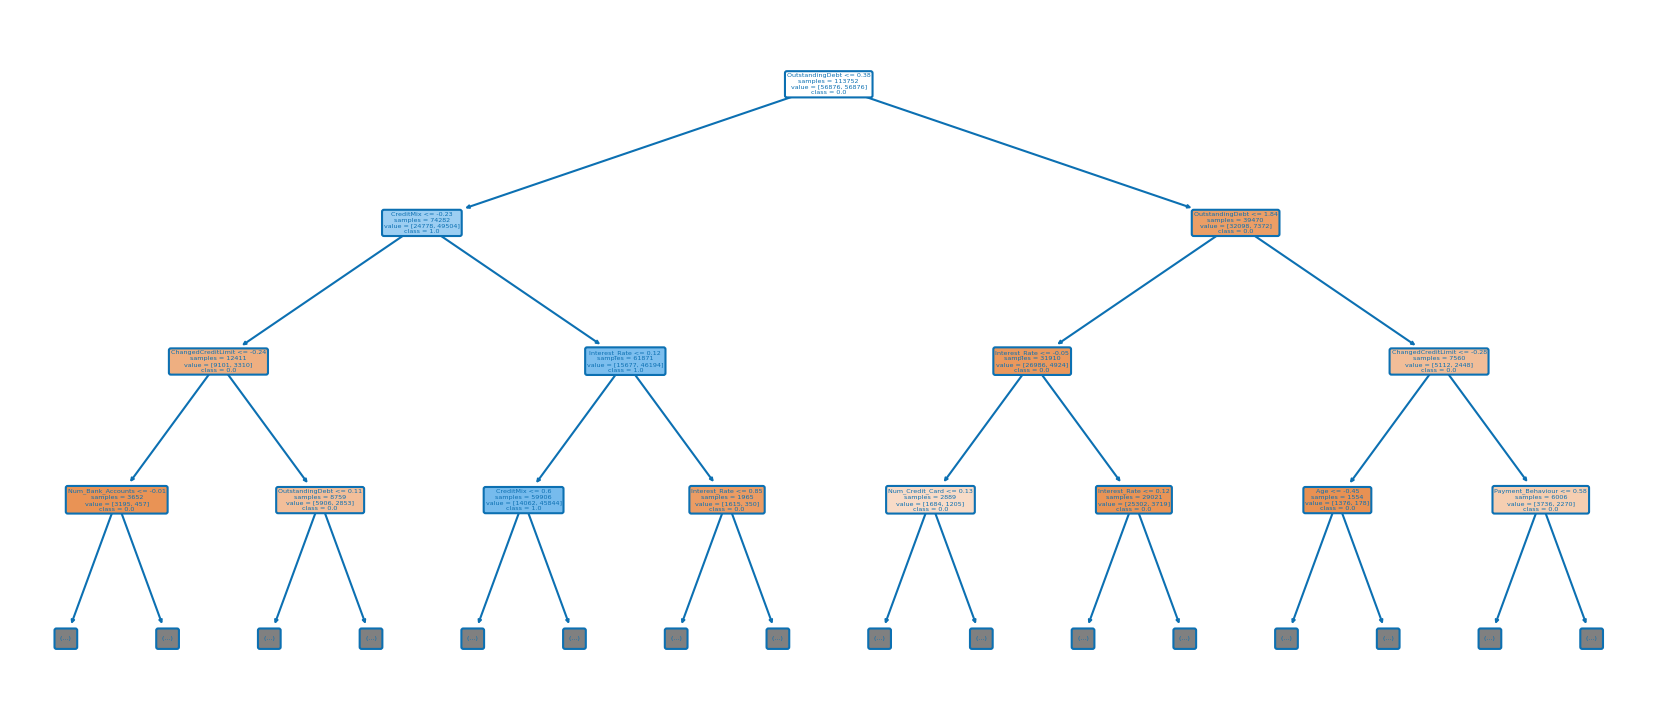

In [7]:
from sklearn.tree import plot_tree

figure(figsize=(14, 6))
plot_tree(
    best_model,
    max_depth=max_depth2show,
    feature_names=vars,
    class_names=st_labels,
    filled=True,
    rounded=True,
    impurity=False,
    precision=2,
)

filename = f"classification_images/decision_tree/{file_tag}_dt_{eval_metric}_best_tree_simplified"
savefig(filename + ".png")

## A

1. OutstandingDebt (0.23246159081685672)
2. CreditMix (0.08656892009053832)
3. Interest_Rate (0.06709181419580426)
4. Monthly_Inhand_Salary (0.0646487015624299)
5. Credit_History_Age (0.06316264554958792)
6. Delay_from_due_date (0.05988679481942084)
7. CreditUtilizationRatio (0.05356130095120406)
8. ChangedCreditLimit (0.050184128082862496)
9. Age (0.04446201900150827)
10. Month (0.04030469852328396)
11. Num_Credit_Card (0.034217448459582155)
12. Occupation (0.031324023704265874)
13. NumCreditInquiries (0.03126898950349707)
14. Num_Bank_Accounts (0.02937665252370866)
15. Payment_Behaviour (0.023496749436577594)
16. Personal Loan (0.0103959644751835)
17. Payday Loan (0.009767186736815535)
18. Student Loan (0.009517392309893215)
19. Debt Consolidation Loan (0.009367805978223773)
20. Credit-Builder Loan (0.009079506917476325)
21. Not Specified Loan (0.009046971552557074)
22. Home Equity Loan (0.00891299768367815)
23. Mortgage Loan (0.008323099569007196)
24. Auto Loan (0.007783363053470711

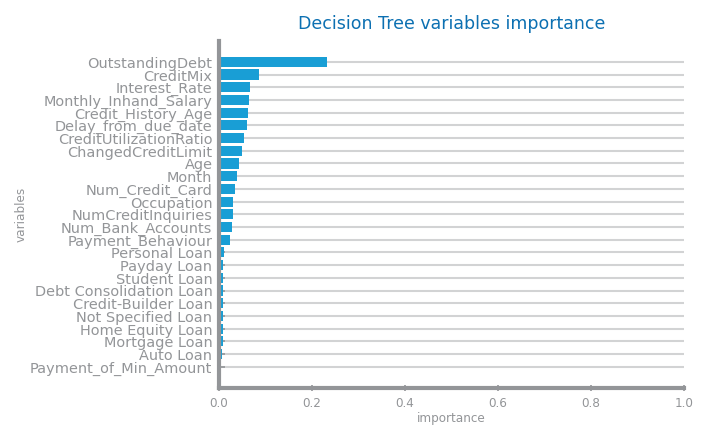

In [10]:
from numpy import argsort
from dslabs_functions import plot_horizontal_bar_chart

importances = best_model.feature_importances_
indices: list[int] = argsort(importances)[::-1]
elems: list[str] = []
imp_values: list[float] = []
for f in range(len(vars)):
    elems += [vars[indices[f]]]
    imp_values += [importances[indices[f]]]
    print(f"{f+1}. {elems[f]} ({importances[indices[f]]})")

figure()
plot_horizontal_bar_chart(
    elems,
    imp_values,
    title="Decision Tree variables importance",
    xlabel="importance",
    ylabel="variables",
    percentage=True,
)
savefig(f"classification_images/decision_tree/{file_tag}_dt_{eval_metric}_vars_ranking.png")

{'name': 'DT', 'metric': 'accuracy', 'params': ('entropy', 26)}


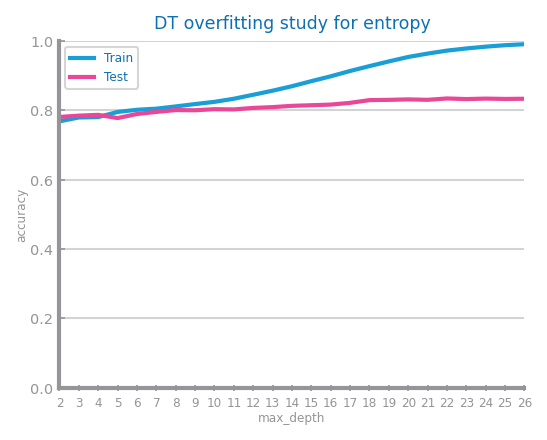

In [17]:
from typing import Literal
from numpy import array
from sklearn.tree import DecisionTreeClassifier

print(params)
crit: Literal["entropy", "gini"] = params["params"][0]
d_max = params["params"][1]
depths: list[int] = [i for i in range(2, d_max + 1, 1)]
y_tst_values: list[float] = []
y_trn_values: list[float] = []
acc_metric = "accuracy"
for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, criterion=crit, min_impurity_decrease=0)
    clf.fit(trnX, trnY)
    prd_tst_Y: array = clf.predict(tstX)
    prd_trn_Y: array = clf.predict(trnX)
    y_tst_values.append(dslabs.CLASS_EVAL_METRICS[acc_metric](tstY, prd_tst_Y))
    y_trn_values.append(dslabs.CLASS_EVAL_METRICS[acc_metric](trnY, prd_trn_Y))

figure()
dslabs.plot_multiline_chart(
    depths,
    {"Train": y_trn_values, "Test": y_tst_values},
    title=f"DT overfitting study for {crit}",
    xlabel="max_depth",
    ylabel=str(eval_metric),
    percentage=True,
)
savefig(f"classification_images/decision_tree/{file_tag}_dt_{eval_metric}_overfitting.png")